In [36]:
from bs4 import BeautifulSoup
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
url='https://web.archive.org/web/20230908091635/https:/en.wikipedia.org/wiki/List_of_largest_banks'

page=r.get(url)

soup=BeautifulSoup(page.text,'html')

<html><head><meta charset="utf-8"/><title>Internet Archive: Scheduled Maintenance</title><style>p{font-size:24px;}img{margin-bottom:2rem;}</style></head>
<body style="padding:30px 0;">
<div style="float:left;width:260px;text-align:center;">




</div>
<div style="overflow:hidden;width:500px;padding:0 30px">
<h1 style="margin-top:0">Temporarily Offline</h1>
<p>Internet Archive services are temporarily offline.</p>
<p>Please check our <a href="https://twitter.com/internetarchive/">Twitter feed</a> for the latest information.</p>
<p>We apologize for the inconvenience.</p>
</div></body></html>


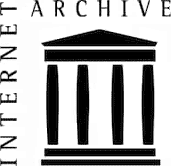
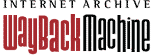
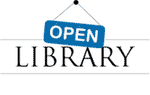
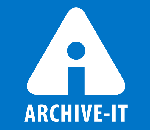

In [9]:
print(soup)

In [21]:
table=soup.find_all('table')[1]

IndexError: list index out of range

In [22]:
soup.find('table',class_='wikitable sortable mw-collapsible')

In [19]:
print(table)

NameError: name 'table' is not defined

In [20]:
table_titles=table.find_all('th')

NameError: name 'table' is not defined

In [14]:
print(table_titles)

NameError: name 'table_titles' is not defined

In [15]:
bank_table_titles=[title.text.strip() for title in table_titles]

print(bank_table_titles)

NameError: name 'table_titles' is not defined

In [16]:
df=pd.DataFrame(columns=bank_table_titles)

df

NameError: name 'bank_table_titles' is not defined

In [24]:
column_data=table.find_all('tr')

In [27]:
for row in column_data[1:]:
    row_data=row.find_all('td')
    indv_row_data=[data.text.strip() for data in row_data]
    #print(indv_row_data)

    Length=len(df)
    df.loc[Length]=indv_row_data

In [28]:
df

,Rank,Bank name,Total assets(2022)(US$ billion)
0,1,Industrial and Commercial Bank of China Limited,"5,742.86"
1,2,China Construction Bank,"5,016.81"
2,3,Agricultural Bank of China,"4,919.03"
3,4,Bank of China,"4,192.12"
4,5,JPMorgan Chase,"3,868.24"
...,...,...,...
95,96,National Bank of Canada,312.67
96,97,Macquarie Group,313.47
97,98,Nationwide Building Society,311.93
98,99,Raiffeisen Gruppe,303.50


In [32]:
df.to_csv(r'E:\\Bytewise\\First Month ETL project\\Bank_Rankings.csv',index=False)

In [48]:
ds=pd.read_csv('E:\Bytewise\First Month ETL project\Bank_Rankings.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\H.H\AppData\Local\Temp\ipykernel_7916\1751816340.py:1: SyntaxWarning: invalid escape sequence '\B'
  ds=pd.read_csv('E:\Bytewise\First Month ETL project\Bank_Rankings.csv')


In [38]:
df.head()

,Rank,Bank name,Total assets(2022)(US$ billion)
0,1,Industrial and Commercial Bank of China Limited,"5,742.86"
1,2,China Construction Bank,"5,016.81"
2,3,Agricultural Bank of China,"4,919.03"
3,4,Bank of China,"4,192.12"
4,5,JPMorgan Chase,"3,868.24"


In [39]:
df.describe()

,Rank,Bank name,Total assets(2022)(US$ billion)
count,100,100,100
unique,100,100,100
top,1,Industrial and Commercial Bank of China Limited,"5,742.86"
freq,1,1,1


In [40]:
import sqlite3

In [42]:
df.isnull().sum()

Rank                               0
Bank name                          0
Total assets(2022)(US$ billion)    0
dtype: int64

In [43]:
df.columns

Index(['Rank', 'Bank name', 'Total assets(2022)(US$ billion)'], dtype='object')

In [49]:
ds['Total assets(2022)(US$ billion)'] = ds['Total assets(2022)(US$ billion)'].str.replace(',', '')
#ds['Total assets(2022)(US$ billion)'] = ds['Total assets(2022)(US$ billion)'].str.replace('-', '')


In [50]:
ds['Total assets(2022)(US$ billion)'] = ds['Total assets(2022)(US$ billion)'].astype(float)


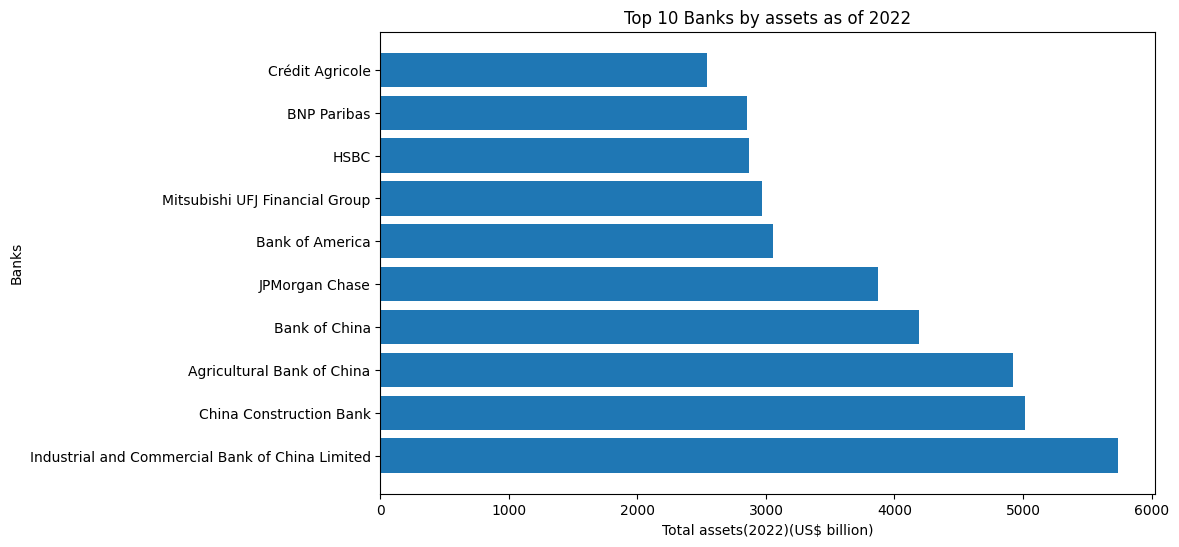

In [51]:
# Example visualization: Top 10 countries by population
top_10 =ds.nlargest(10, 'Total assets(2022)(US$ billion)')

plt.figure(figsize=(10, 6))
plt.barh(top_10['Bank name'], top_10['Total assets(2022)(US$ billion)'])
plt.xlabel('Total assets(2022)(US$ billion)')
plt.ylabel('Banks')
plt.title('Top 10 Banks by assets as of 2022')
plt.show()

In [52]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Rank                             100 non-null    int64  
 1   Bank name                        100 non-null    object 
 2   Total assets(2022)(US$ billion)  100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


C:\Users\H.H\AppData\Local\Temp\ipykernel_7916\1417487351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Asset Class', data=ds, palette='viridis')


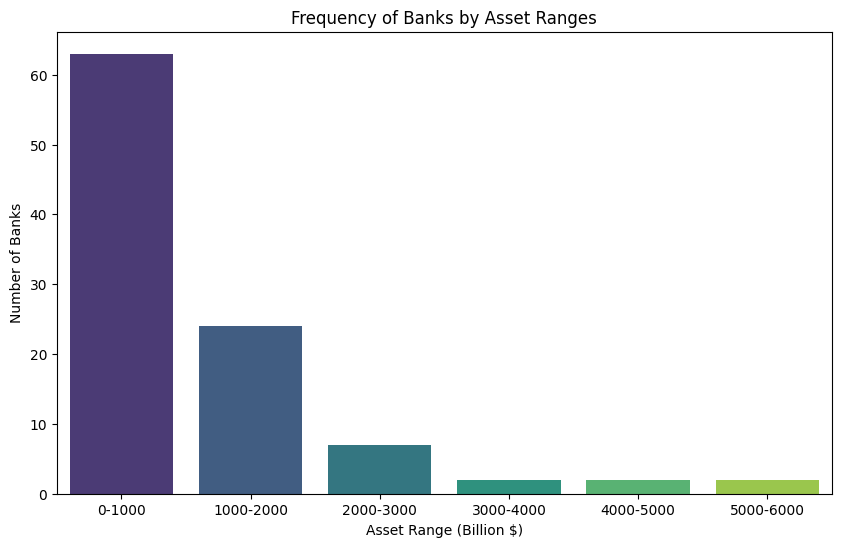

In [54]:
bins = [0, 1000, 2000, 3000, 4000,5000,6000]  
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000','4000-5000','5000-6000']

# Cut the data into bins
ds['Asset Class'] = pd.cut(ds['Total assets(2022)(US$ billion)'], bins=bins, labels=labels, right=False)

# Plot the frequency graph
plt.figure(figsize=(10, 6))
sns.countplot(x='Asset Class', data=ds, palette='viridis')
plt.title('Frequency of Banks by Asset Ranges')
plt.xlabel('Asset Range (Billion $)')
plt.ylabel('Number of Banks')
plt.show()
